In [1]:
import pandas as pd
import numpy as np

# Charger les données
genome_scores_df = pd.read_csv('/Film_recom/Datasets/genome-scores.csv')

# Afficher les premières lignes du DataFrame
print("Premières lignes du DataFrame:")
print(genome_scores_df.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
print(genome_scores_df.info())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes dans le DataFrame:")
print(genome_scores_df.isnull().sum())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives:")
print(genome_scores_df.describe())

# Nombre total d'entrées
print(f"\nNombre total d'entrées: {len(genome_scores_df)}")

# Nombre de films uniques
print(f"Nombre de films uniques: {genome_scores_df['movieId'].nunique()}")

# Nombre de tags uniques
print(f"Nombre de tags uniques: {genome_scores_df['tagId'].nunique()}")

# Distribution des scores
print("\nDistribution des scores:")
print(genome_scores_df['relevance'].describe())

# Scores minimum et maximum
print(f"\nScore minimum: {genome_scores_df['relevance'].min()}")
print(f"Score maximum: {genome_scores_df['relevance'].max()}")

# Films avec le plus grand nombre de tags
movies_tag_count = genome_scores_df.groupby('movieId').size().sort_values(ascending=False)
print("\nTop 10 des films avec le plus grand nombre de tags:")
print(movies_tag_count.head(10))

# Tags les plus fréquents
tags_frequency = genome_scores_df.groupby('tagId').size().sort_values(ascending=False)
print("\nTop 10 des tags les plus fréquents:")
print(tags_frequency.head(10))

# Scores moyens par tag
avg_scores_by_tag = genome_scores_df.groupby('tagId')['relevance'].mean().sort_values(ascending=False)
print("\nTop 10 des tags avec les scores moyens les plus élevés:")
print(avg_scores_by_tag.head(10))

# Scores moyens par film
avg_scores_by_movie = genome_scores_df.groupby('movieId')['relevance'].mean().sort_values(ascending=False)
print("\nTop 10 des films avec les scores moyens les plus élevés:")
print(avg_scores_by_movie.head(10))

# Vérifier la distribution des scores
print("\nDistribution des scores (par décile):")
print(genome_scores_df['relevance'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

Premières lignes du DataFrame:
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675

Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB
None

Valeurs manquantes dans le DataFrame:
movieId      0
tagId        0
relevance    0
dtype: int64

Statistiques descriptives:
            movieId         tagId     relevance
count  1.170977e+07  1.170977e+07  1.170977e+07
mean   2.584297e+04  5.645000e+02  1.164833e-01
std    3.467615e+04  3.256254e+02  1.542463e-01
min    1.000000e+00  1.000000e+00  2.500000e-04
25%    2.926000e+03  2.827500e+02  2.425000e-02
50%    6.017000e+03  5.645000e+02  5.650000e-02
75%    4.60

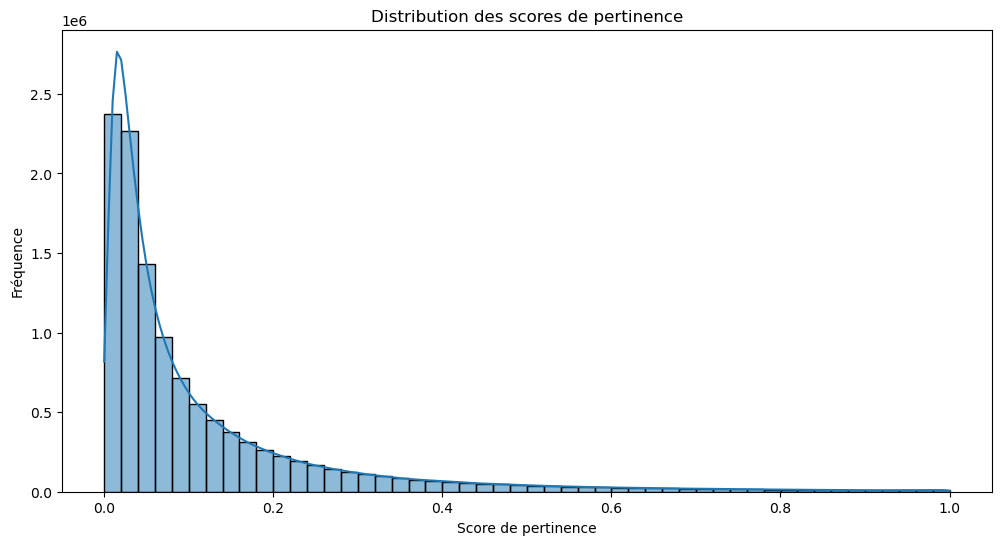

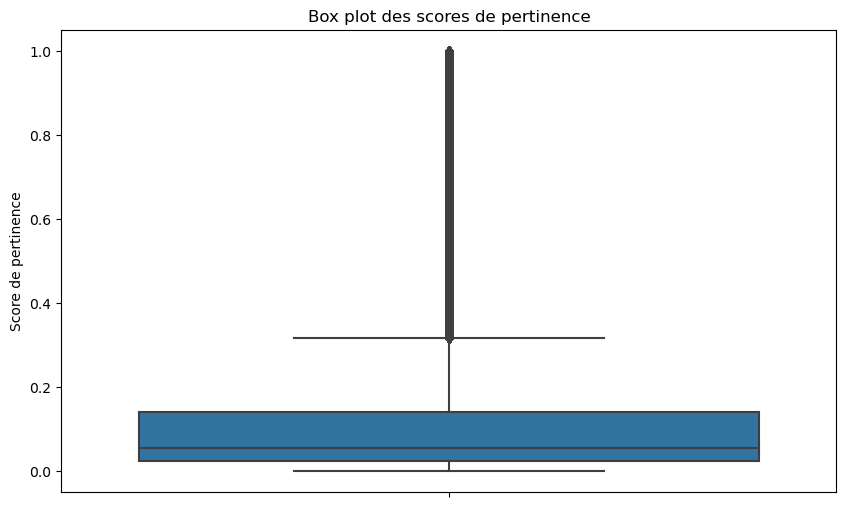

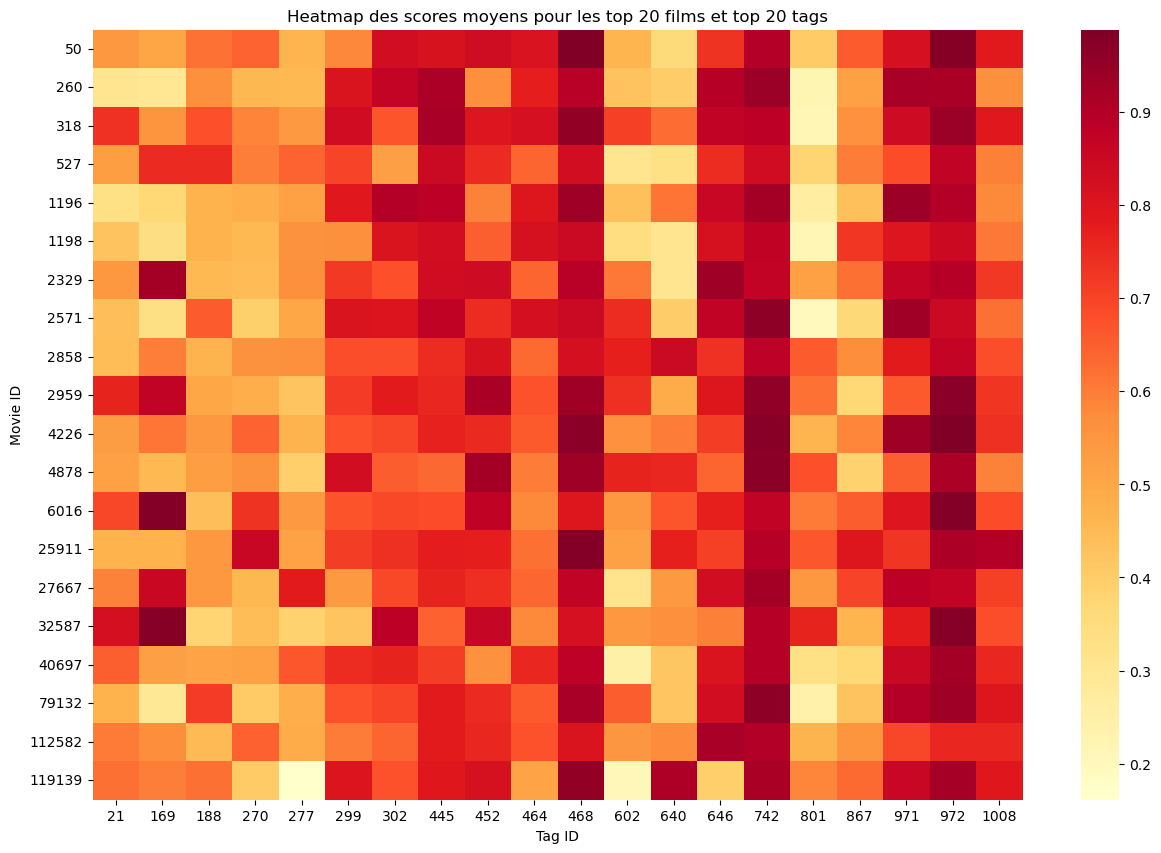

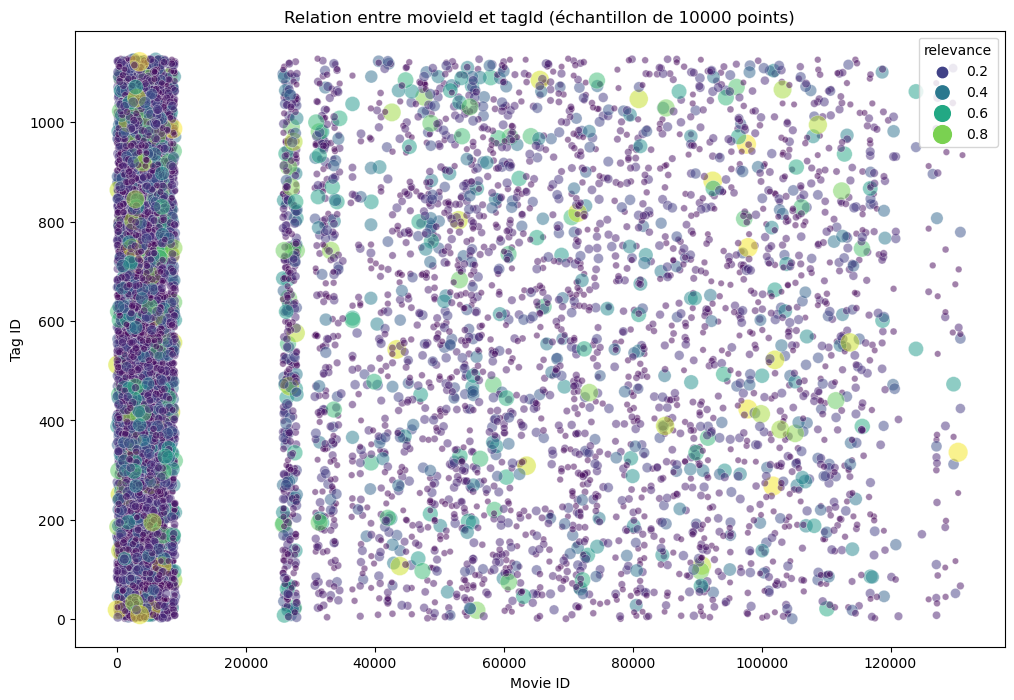

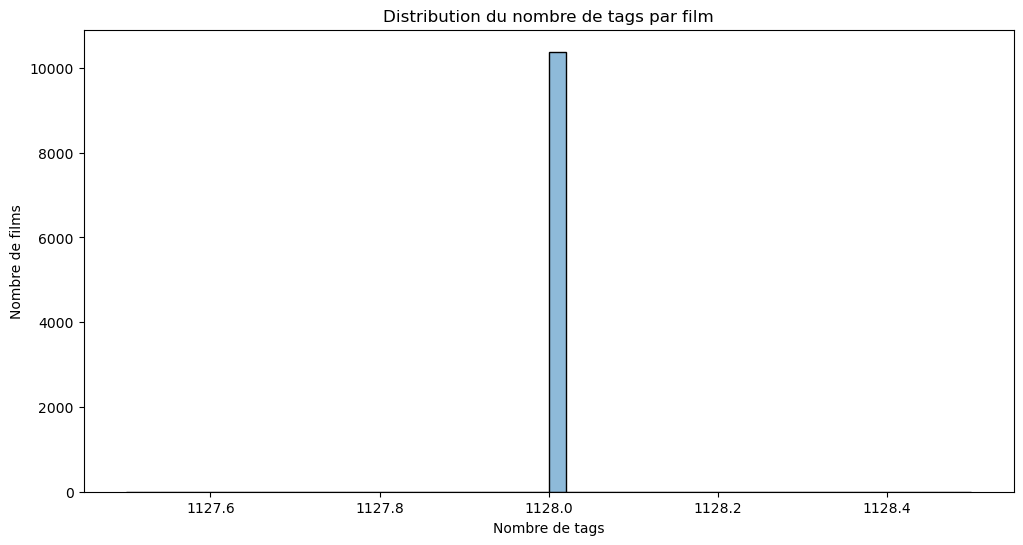

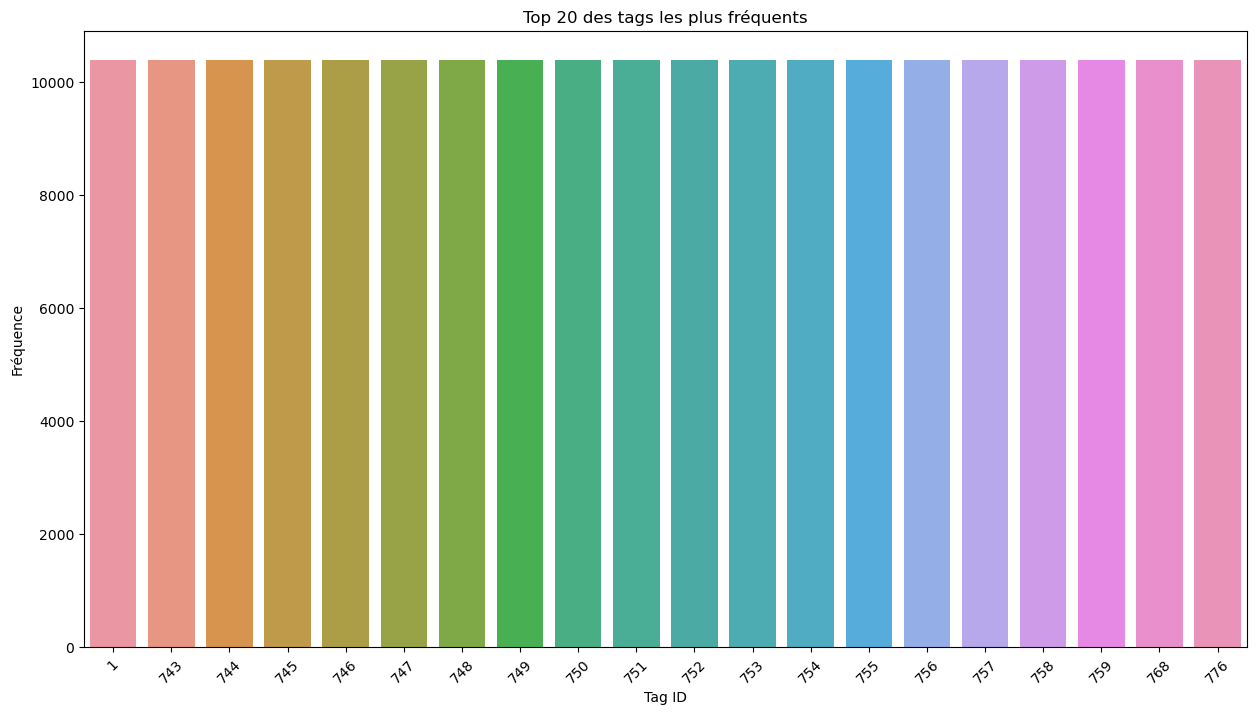

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données (si ce n'est pas déjà fait)
genome_scores_df = pd.read_csv('/Film_recom/genome-scores.csv')

# 1. Distribution des scores de pertinence
plt.figure(figsize=(12, 6))
sns.histplot(genome_scores_df['relevance'], bins=50, kde=True)
plt.title('Distribution des scores de pertinence')
plt.xlabel('Score de pertinence')
plt.ylabel('Fréquence')
plt.show()

# 2. Box plot des scores de pertinence
plt.figure(figsize=(10, 6))
sns.boxplot(y='relevance', data=genome_scores_df)
plt.title('Box plot des scores de pertinence')
plt.ylabel('Score de pertinence')
plt.show()

# 3. Heatmap des scores moyens pour les top 20 films et top 20 tags
top_20_movies = genome_scores_df.groupby('movieId')['relevance'].mean().nlargest(20).index
top_20_tags = genome_scores_df.groupby('tagId')['relevance'].mean().nlargest(20).index

heatmap_data = genome_scores_df[genome_scores_df['movieId'].isin(top_20_movies) & genome_scores_df['tagId'].isin(top_20_tags)]
heatmap_pivot = heatmap_data.pivot(index='movieId', columns='tagId', values='relevance')

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_pivot, cmap='YlOrRd', annot=False)
plt.title('Heatmap des scores moyens pour les top 20 films et top 20 tags')
plt.xlabel('Tag ID')
plt.ylabel('Movie ID')
plt.show()

# 4. Scatter plot de la relation entre movieId et tagId
plt.figure(figsize=(12, 8))
sns.scatterplot(data=genome_scores_df.sample(10000), x='movieId', y='tagId', hue='relevance', palette='viridis', size='relevance', sizes=(20, 200), alpha=0.5)
plt.title('Relation entre movieId et tagId (échantillon de 10000 points)')
plt.xlabel('Movie ID')
plt.ylabel('Tag ID')
plt.show()

# 5. Distribution du nombre de tags par film
tags_per_movie = genome_scores_df.groupby('movieId').size()
plt.figure(figsize=(12, 6))
sns.histplot(tags_per_movie, bins=50, kde=True)
plt.title('Distribution du nombre de tags par film')
plt.xlabel('Nombre de tags')
plt.ylabel('Nombre de films')
plt.show()

# 6. Top 20 des tags les plus fréquents
top_20_frequent_tags = genome_scores_df['tagId'].value_counts().nlargest(20)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_20_frequent_tags.index, y=top_20_frequent_tags.values)
plt.title('Top 20 des tags les plus fréquents')
plt.xlabel('Tag ID')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from genome_scores_pipeline import GenomeScoreDataPipeline

# Créer une instance du pipeline
pipeline = GenomeScoreDataPipeline('/Film_recom/genome-scores.csv')

# Exécuter le pipeline
pipeline.run_pipeline()

# Si vous voulez accéder aux données traitées
processed_data = pipeline.get_data()

# Vous pouvez maintenant utiliser processed_data pour d'autres analyses si nécessaire